<a href="https://colab.research.google.com/github/Isha055014/LSTM---Stock-Price-Prediction-Comparison--DLM/blob/main/LSTM_stocks_prediction_and_comparsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Project Information**

**Project Title**:
Stock Price Prediction using LSTM & Comparison with NIFTY-Based Predictions

**Student Names**: Isha Gupta | Sneha Gupta

**Enrollment Numbers**: 055014 | 055047

**Group Number**: 9



# **2. Description of Data**

**Data Source**: Yahoo Finance (https://finance.yahoo.com)

**Data Size**: Approx. 25 years of stock data

**Data Type**: Time-series data

**Data Dimension**:

- **Number of Variables**: 3 datasets (NIFTY 50, TCS, Infosys)

- **Number of Observations**: Daily closing stock prices over 25 years

**Data Variable Type**:

- **Numeric**: Decimal values (closing stock prices)

- **Non-Numeric**: None

**Data Variable Category**:

- **Category-I**:

 - **Index**: Date (Time-Series)

 - **Non-Categorical**: Stock Price

- **Category-II**:

 - **Input Variables** (Features): Past stock prices

 - **Outcome Variables** (Targets): Future stock prices

**About Dataset**:

The dataset consists of historical stock prices for TCS and Infosys, along with NIFTY 50 index data. This data allows us to analyze and compare LSTM-based stock predictions with NIFTY-based predictions.

# **3. Project Objectives | Problem Statements**

### **Objectives**:

- To develop an LSTM-based predictive model to forecast stock prices of TCS and Infosys.

- To compare the model’s predictions with actual stock prices to assess its accuracy.

- To predict NIFTY 50 stock movement and use it to estimate TCS and Infosys stock prices.

- To evaluate the difference in stock movements when using a generic model versus a stock-specific one.

- To analyze the performance of the LSTM model across different stocks and determine the need for hyperparameter tuning for each company.


### **Problem Statements**:

- Can LSTM accurately predict stock prices based on historical data?

- How does the LSTM model's prediction compare to actual stock movements?

- Can NIFTY-based predictions serve as an alternative method for forecasting individual stock prices?

- Does the same LSTM model perform equally well for different stocks?



# **4. Analysis of Data**

### **Steps Taken**:

1. **Data Collection**: Downloaded daily closing prices for TCS, Infosys, and NIFTY 50 from Yahoo Finance.

2. **Preprocessing**: Extracted the closing price, normalized data using MinMaxScaler, and created sequences for training.

3. **Model Training**:

 - Developed an LSTM model with two layers and dropout to prevent overfitting.

 - Trained separate models for TCS and Infosys.

4. **Evaluation**:

 - **Compared predictions against actual stock prices for the last 60 days**.
 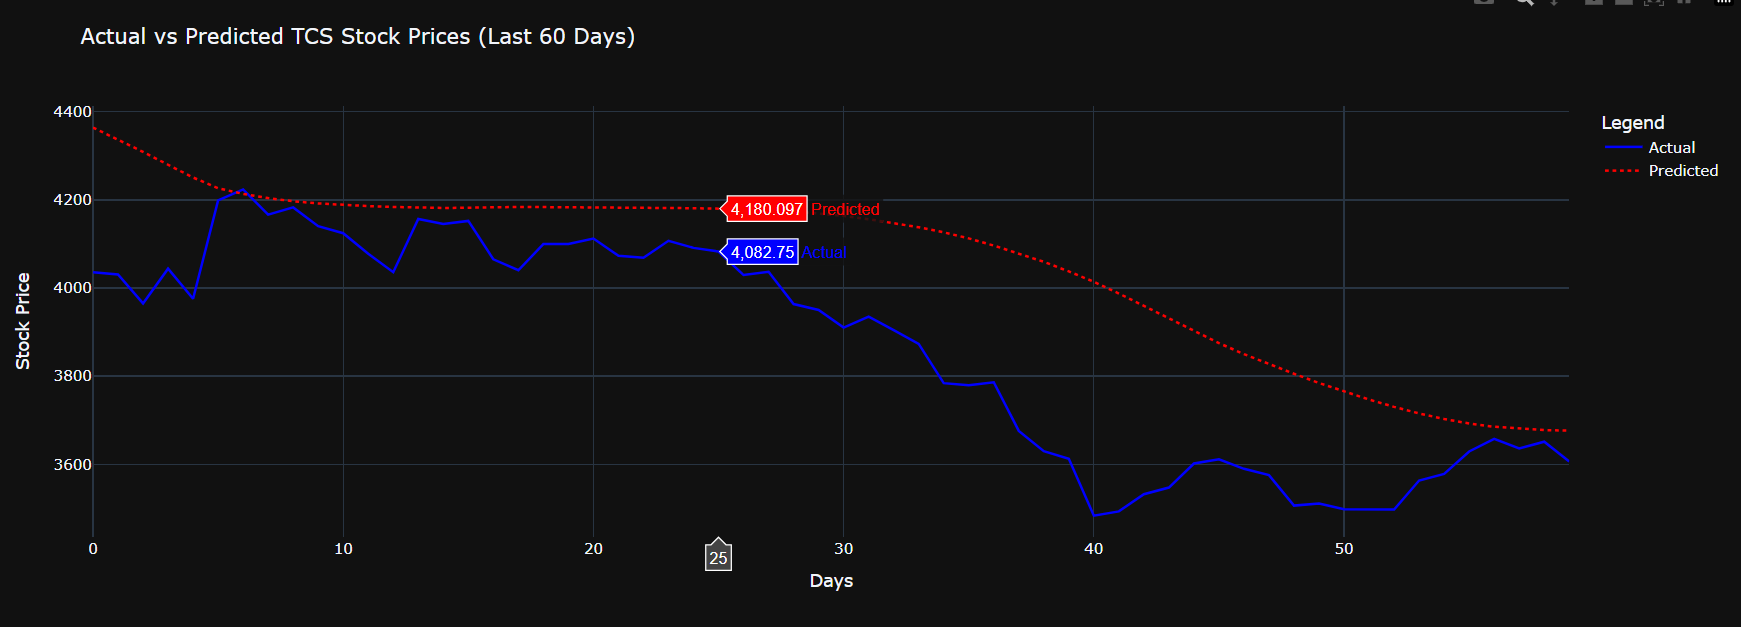

 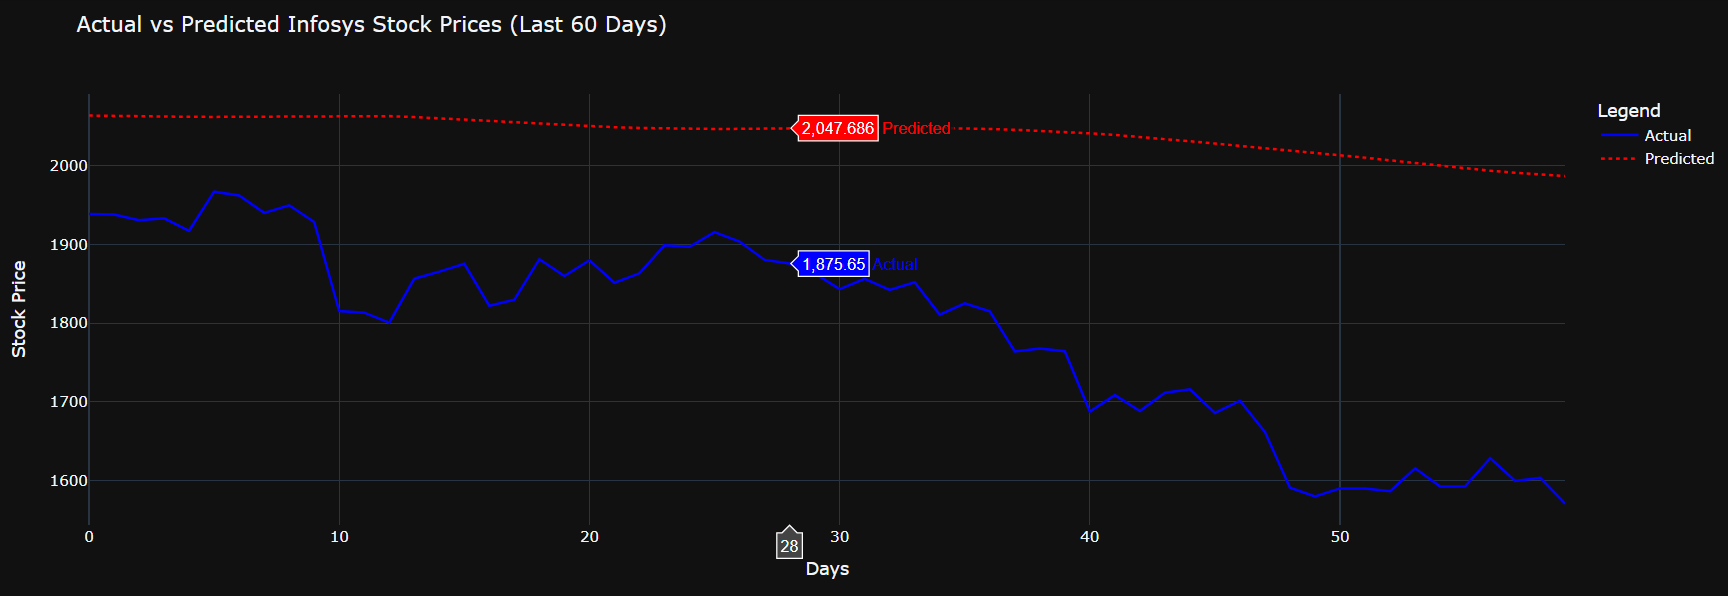

---

 - **Predicted stock prices for the next 30 days**.
 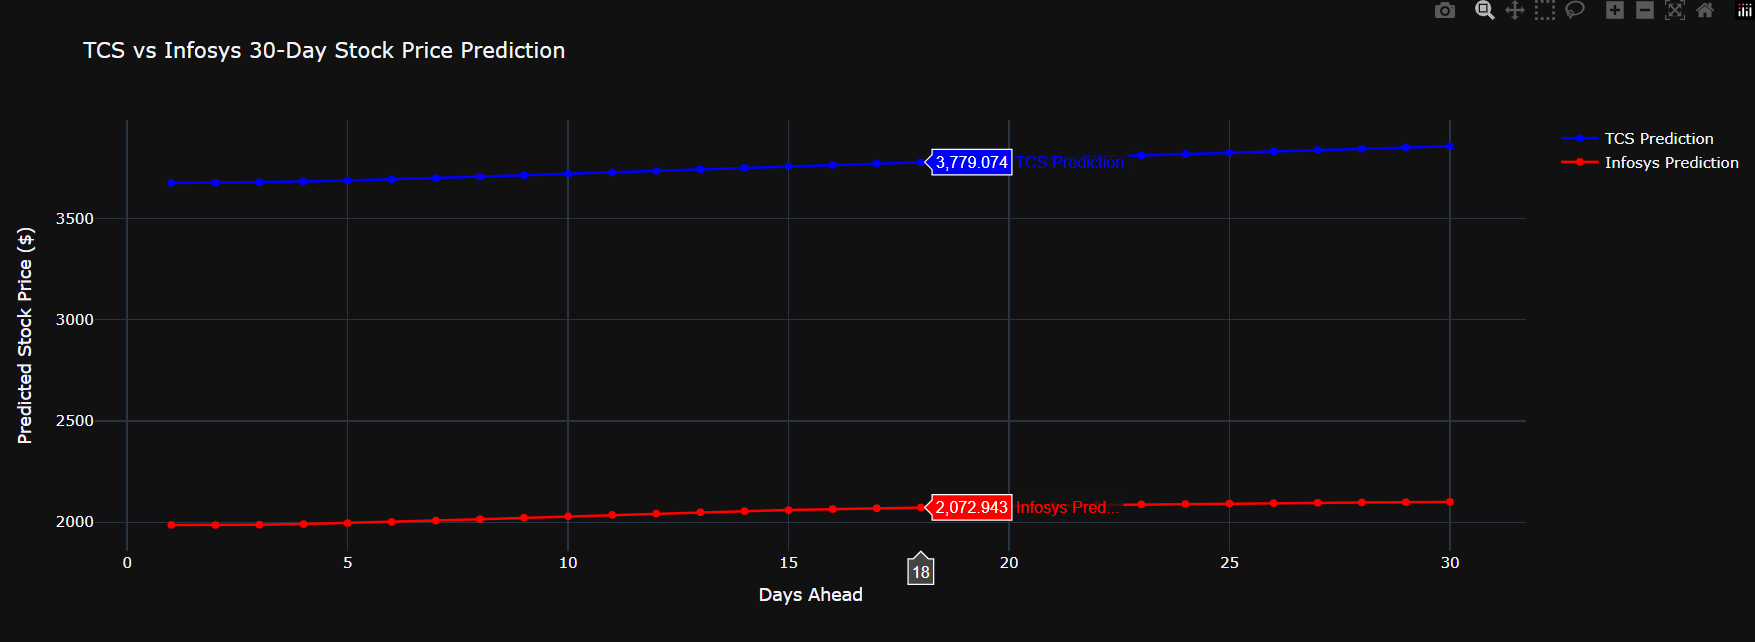

---
 - **Used NIFTY 50 data to generate alternative predictions for TCS and Infosys**.


5. **Comparison**:

 - **Analyzed RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) for each model**.

 - **Compared results between LSTM-based and NIFTY-based predictions**.

 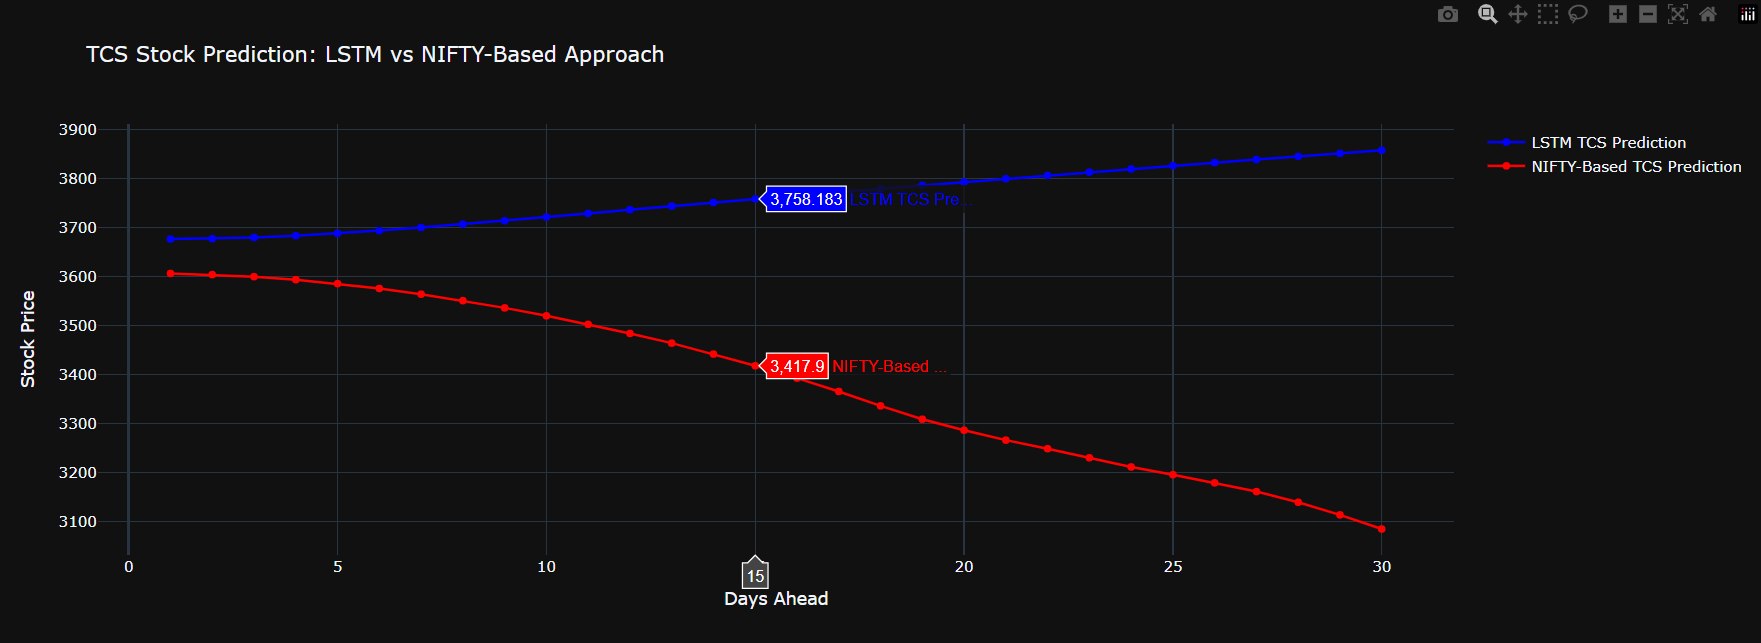

 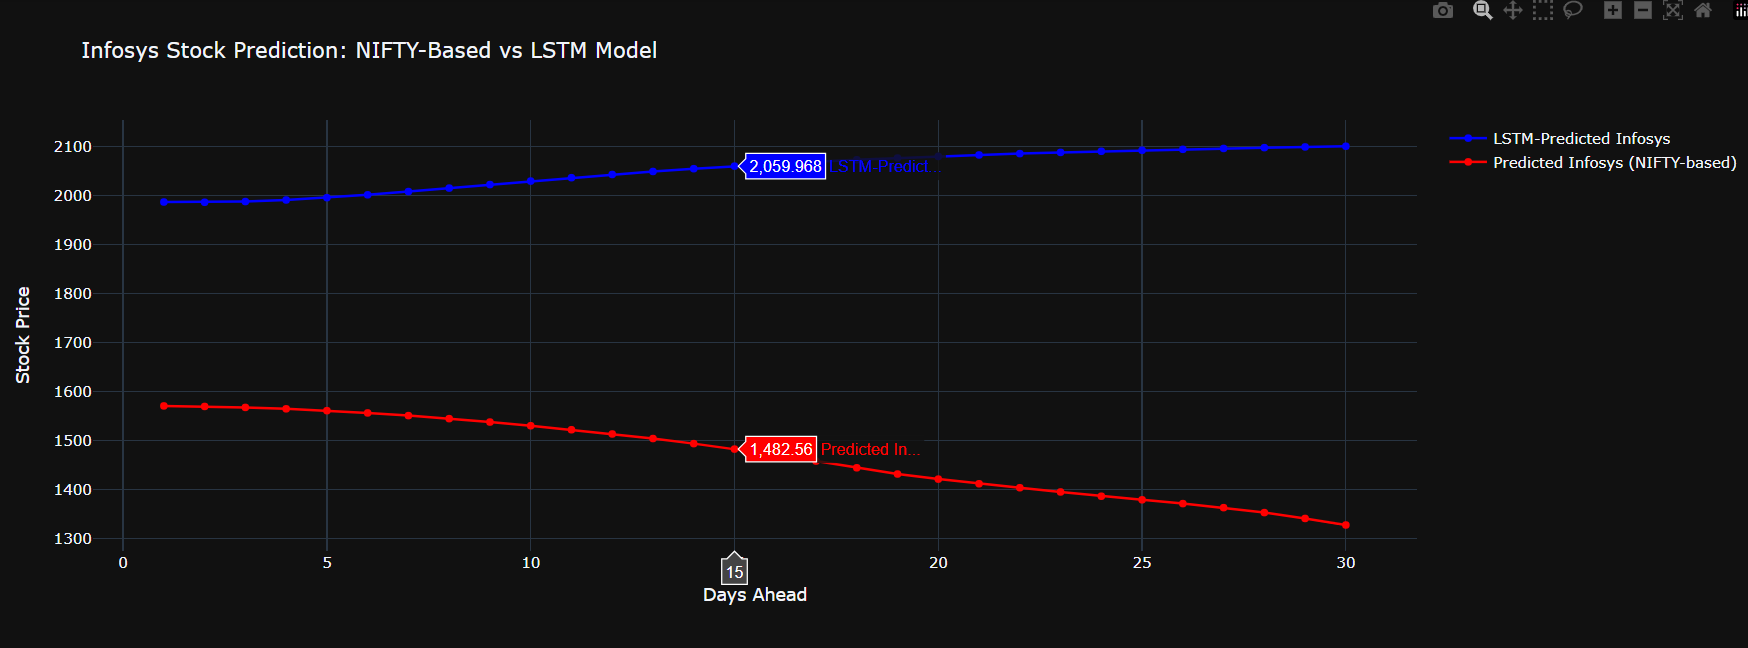

### **Results**:

- RMSE values indicated varying accuracy levels across stocks.

- The same model performed differently for TCS and Infosys, highlighting the importance of stock-specific tuning.

- NIFTY-based predictions provided a reasonable benchmark but showed discrepancies when compared to the LSTM predictions.

# **5. Observations | Findings**

### **Key Observations**:

1. **LSTM Model Performance**:

 - The RMSE for TCS and Infosys varied, indicating that a single model does not work uniformly for all stocks.

 - Infosys stock had a lower RMSE compared to TCS, suggesting better predictive accuracy.

2. **NIFTY-Based Predictions**:

 - While NIFTY 50 trends influenced individual stock prices, the correlation was not always strong.

    - Correlation between LSTM-based TCS & NIFTY 50-based: 0.46989880150061847
    - Correlation between LSTM-based INFOSYS & NIFTY 50-based: 0.5057813770338194


 - NIFTY-based predictions did not fully capture the nuances of individual stock movements.

3. **Model Comparison**:

 - The LSTM model, despite its limitations, captured individual stock patterns better than the NIFTY-based approach.

 - Different hyperparameters might be required for each stock to improve performance.

### **Findings from RMSE Analysis**:

- TCS Model RMSE: 167.59 | MAE: 161.19

- Infosys Model RMSE: 64.55 | MAE: 63.98

These findings suggest that Infosys' stock was easier to predict using this approach compared to TCS.

# **6. Managerial Insights | Recommendations**

### **Business Implications**:

**Company-Specific Model Tuning**:

- Using a single LSTM model for multiple stocks may not yield optimal results.

- Each stock requires different hyperparameter tuning to achieve better accuracy.

- To improve predictions, we might consider including additional factors like sector indices, global IT market trends, or macroeconomic indicators to refine the model for more accurate results.

**NIFTY vs. LSTM Approach**:

- While NIFTY 50 provides a broad market indicator, it does not fully replace individual stock forecasting.

- A hybrid approach combining LSTM predictions with NIFTY trends could improve accuracy.

**Investment Decision Insights**:

- Investors should not rely solely on market indices for stock predictions.

- Individual stock behaviors, company-specific factors, and technical analysis should be considered alongside market trends.

### **Future Recommendations**:

- **Hyperparameter Optimization**: Conduct grid search or Bayesian optimization to fine-tune LSTM models for individual stocks.

- **Feature Engineering**: Include additional indicators (e.g., moving averages, RSI, MACD) to enhance predictions.

- **Multi-Stock Training**: Explore Transformer-based models that handle multiple stock predictions simultaneously.

- **Longer Training Data**: Use more historical data for improved trend recognition.

### **Conclusion**:

This project demonstrates the strengths and limitations of LSTM models in stock price prediction. While LSTMs provide promising results, stock-specific tuning and additional market indicators are necessary to improve accuracy. Comparing LSTM-based predictions with NIFTY-based forecasts highlights the importance of individualized models for better financial decision-making.

---

In [2]:
!pip install quandl yfinance tensorflow numpy pandas matplotlib scikit-learn

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [26]:
# Fetch NIFTY 50 data
nifty_ig14_df = yf.download("^NSEI", period = "15y", interval = "1d")

# Display the first few rows
print(nifty_ig14_df.head())

# Check total data size
print(f"Total data points: {len(nifty_ig14_df)}")

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2010-03-29  5302.850098  5329.549805  5242.149902  5283.899902      0
2010-03-30  5262.450195  5325.000000  5251.350098  5302.950195      0
2010-03-31  5249.100098  5293.899902  5235.149902  5260.399902      0
2010-04-01  5290.500000  5298.600098  5249.200195  5249.200195      0
2010-04-05  5368.399902  5377.549805  5291.399902  5291.399902      0
Total data points: 3685


In [27]:
# Fetch TCS and Infosys stock data
TCS_ig14_df = yf.download("TCS.NS", period="15y", interval="1d")
Infosys_ig14_df = yf.download("INFY.NS", period="15y", interval="1d")

# Display sample data
print(TCS_ig14_df.head())
print(Infosys_ig14_df.head())

print(f"Total data points: {len(TCS_ig14_df)}")
print(f"Total data points: {len(Infosys_ig14_df)}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker          TCS.NS      TCS.NS      TCS.NS      TCS.NS   TCS.NS
Date                                                               
2010-03-29  312.100403  318.769452  310.793489  316.732223  3443266
2010-03-30  307.507111  313.695682  306.411626  310.812803  3097160
2010-03-31  300.069214  310.293813  298.781514  307.507031  7083046
2010-04-01  310.505219  311.273986  300.626550  302.260182  5781432
2010-04-05  308.794739  314.041587  307.218774  314.041587  3001836
Price            Close        High         Low        Open    Volume
Ticker         INFY.NS     INFY.NS     INFY.NS     INFY.NS   INFY.NS
Date                                                                
2010-03-29  245.363953  250.182458  243.882737  249.098635  13981704
2010-03-30  238.811279  245.214855  237.591979  245.214855  10649936
2010-03-31  236.268845  241.755697  235.424379  239.696430  13070104
2010-04-01  241.191223  241.873133  236.63

In [28]:
# Keep only the 'Close' price
nifty_close = nifty_ig14_df[['Close']]
TCS_close = TCS_ig14_df[['Close']]
Infosys_close = Infosys_ig14_df[['Close']]

In [29]:
# Fit MinMaxScaler on all three datasets combined
scaler = MinMaxScaler(feature_range=(0,1))

all_data = np.concatenate((nifty_close, TCS_close, Infosys_close), axis=0)
scaler.fit(all_data.reshape(-1,1))

# Transform each dataset consistently
nifty_scaled = scaler.transform(nifty_close.values.reshape(-1,1))
TCS_scaled = scaler.transform(TCS_close.values.reshape(-1,1))
Infosys_scaled = scaler.transform(Infosys_close.values.reshape(-1,1))

In [30]:
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Prepare sequences for each stock
X_nifty, y_nifty = create_sequences(nifty_scaled)
X_TCS, y_TCS = create_sequences(TCS_scaled)
X_Infosys, y_Infosys = create_sequences(Infosys_scaled)

In [54]:
# split = int(0.8 * len(X_nifty))

# # NIFTY 50
# X_train_nifty, X_test_nifty = X_nifty[:split], X_nifty[split:]
# y_train_nifty, y_test_nifty = y_nifty[:split], y_nifty[split:]

# # TCS
# X_train_TCS, X_test_TCS = X_TCS[:split], X_TCS[split:]
# y_train_TCS, y_test_TCS = y_TCS[:split], y_TCS[split:]

# # Infosys
# X_train_Infosys, X_test_Infosys = X_Infosys[:split], X_Infosys[split:]
# y_train_Infosys, y_test_Infosys = y_Infosys[:split], y_Infosys[split:]
# -----------------------------------------
def split_data(X, y, split_ratio=0.8):
    split = int(split_ratio * len(X))
    return X[:split], X[split:], y[:split], y[split:]

# Apply splitting separately for each stock
X_train_TCS, X_test_TCS, y_train_TCS, y_test_TCS = split_data(X_TCS, y_TCS)
X_train_Infosys, X_test_Infosys, y_train_Infosys, y_test_Infosys = split_data(X_Infosys, y_Infosys)
X_train_nifty, X_test_nifty, y_train_nifty, y_test_nifty = split_data(X_nifty, y_nifty)
# ------------------------------------------------

In [57]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

def build_improved_lstm():
    model = Sequential([
        LSTM(units=128, return_sequences=True, input_shape=(60, 1)), # Increased units
        BatchNormalization(),
        Dropout(0.25),

        LSTM(units=128, return_sequences=True),
        BatchNormalization(),
        Dropout(0.25),

        LSTM(units=64, return_sequences=False),
        BatchNormalization(),
        Dropout(0.25),

        Dense(units=32),
        LeakyReLU(),
        Dense(units=1)
    ])

    optimizer = Adam(learning_rate=0.0004)  # Reduced learning rate for stability
    model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

    return model

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models

model_TCS = build_improved_lstm()
history_TCS = model_TCS.fit(X_train_TCS, y_train_TCS, epochs=20, batch_size=64, validation_data=(X_test_TCS, y_test_TCS), callbacks=[early_stopping])


model_Infosys = build_improved_lstm()
history_Infosys = model_Infosys.fit(X_train_Infosys, y_train_Infosys, epochs=20, batch_size=64, validation_data=(X_test_Infosys, y_test_Infosys), callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 0.2939 - mae: 0.6057 - val_loss: 0.0016 - val_mae: 0.0533
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.1071 - mae: 0.3672 - val_loss: 0.0019 - val_mae: 0.0579
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 0.0618 - mae: 0.2808 - val_loss: 0.0032 - val_mae: 0.0747
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - loss: 0.0447 - mae: 0.2367 - val_loss: 0.0034 - val_mae: 0.0741
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0281 - mae: 0.1891 - val_loss: 0.0062 - val_mae: 0.1076
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - loss: 0.0224 - mae: 0.1666 - val_loss: 0.0051 - val_mae: 0.1004
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - loss: 0.0187 - mae: 0.1526 - val_loss: 0.0022 - val_mae: 0.0632
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0151 - mae: 0.1376 - val_loss: 0.0050 - val_mae: 0.0948
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.

In [59]:
# Evaluate models
tcs_rmse = np.sqrt(model_TCS.evaluate(X_test_TCS, y_test_TCS, verbose=0)[0])
infosys_rmse = np.sqrt(model_Infosys.evaluate(X_test_Infosys, y_test_Infosys, verbose=0)[0])

print(f"Improved TCS Model RMSE: {tcs_rmse:.2f}")
print(f"Improved Infosys Model RMSE: {infosys_rmse:.2f}")

Improved TCS Model RMSE: 0.01
Improved Infosys Model RMSE: 0.01


In [60]:
# Separate scalers for each stock
scaler_nifty = MinMaxScaler(feature_range=(0, 1))
scaler_tcs = MinMaxScaler(feature_range=(0, 1))
scaler_infosys = MinMaxScaler(feature_range=(0, 1))

# Fit each scaler on its respective stock
nifty_scaled = scaler_nifty.fit_transform(nifty_close.values.reshape(-1, 1))
TCS_scaled = scaler_tcs.fit_transform(TCS_close.values.reshape(-1, 1))
Infosys_scaled = scaler_infosys.fit_transform(Infosys_close.values.reshape(-1, 1))

In [61]:
# Predict TCS stock prices
predicted_TCS = model_TCS.predict(X_test_TCS)
predicted_TCS = scaler_tcs.inverse_transform(predicted_TCS)  # Use TCS scaler
actual_TCS = scaler_tcs.inverse_transform(y_test_TCS.reshape(-1, 1))

# Predict Infosys stock prices
predicted_Infosys = model_Infosys.predict(X_test_Infosys)
predicted_Infosys = scaler_infosys.inverse_transform(predicted_Infosys)  # Use Infosys scaler
actual_Infosys = scaler_infosys.inverse_transform(y_test_Infosys.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [62]:
# Check if values make sense before inverse scaling
print("Raw Predicted TCS:", predicted_TCS[:5].flatten())
print("Raw Actual TCS:", y_test_TCS[:5].flatten())

# Now inverse transform
predicted_TCS = scaler_tcs.inverse_transform(predicted_TCS)
actual_TCS = scaler_tcs.inverse_transform(y_test_TCS.reshape(-1, 1))

# Print again after scaling
print("Scaled Back Predicted TCS:", predicted_TCS[:5].flatten())
print("Scaled Back Actual TCS:", actual_TCS[:5].flatten())

Raw Predicted TCS: [819.0709  819.86346 820.4746  820.9721  821.3488 ]
Raw Actual TCS: [0.12586859 0.12592291 0.12631226 0.12612031 0.12506453]
Scaled Back Predicted TCS: [3442409.8 3445740.5 3448308.8 3450399.5 3451982.8]
Scaled Back Actual TCS: [797.85769898 798.08597376 799.72222562 798.91555484 794.47864862]


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate RMSE and MAE
def evaluate_model(actual, predicted, stock_name):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    print(f"{stock_name} Model RMSE: {rmse:.2f}")
    print(f"{stock_name} Model MAE: {mae:.2f}")

# Evaluate models
evaluate_model(actual_TCS, predicted_TCS, "TCS")
evaluate_model(actual_Infosys, predicted_Infosys, "Infosys")

TCS Model RMSE: 3523941.51
TCS Model MAE: 3515507.19
Infosys Model RMSE: 32.11
Infosys Model MAE: 30.15


In [97]:
# Last 60 Days Prediction & Comparison

import plotly.graph_objects as go

# Predict last 60 days for TCS
predicted_TCS_last_60 = model_TCS.predict(X_test_TCS[-60:])
predicted_TCS_last_60 = scaler.inverse_transform(predicted_TCS_last_60)  # Convert back to original scale
actual_TCS_last_60 = scaler.inverse_transform(y_test_TCS[-60:].reshape(-1, 1))

# Predict last 60 days for Infosys
predicted_Infosys_last_60 = model_Infosys.predict(X_test_Infosys[-60:])
predicted_Infosys_last_60 = scaler.inverse_transform(predicted_Infosys_last_60)
actual_Infosys_last_60 = scaler.inverse_transform(y_test_Infosys[-60:].reshape(-1, 1))

# Function to plot actual vs predicted
def plot_predictions(actual, predicted, stock_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=actual.flatten(), mode='lines', name='Actual', line=dict(color='blue')))
    fig.add_trace(go.Scatter(y=predicted.flatten(), mode='lines', name='Predicted', line=dict(color='red', dash='dot')))
    fig.update_layout(title=f"Actual vs Predicted {stock_name} Stock Prices (Last 60 Days)",
                      xaxis_title="Days", yaxis_title="Stock Price", legend_title="Legend", hovermode="x", template="plotly_dark")
    fig.show()

# Plot results
plot_predictions(actual_TCS_last_60, predicted_TCS_last_60, "TCS")
plot_predictions(actual_Infosys_last_60, predicted_Infosys_last_60, "Infosys")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [68]:
import numpy as np

def predict_next_days(model, last_data, scaler, days=30):
    """
    Predicts the next '30 days' stock prices based on the last 60 days of data.
    """
    predictions = []

    # Ensure last_data is in the correct shape
    # Change 60 to 30 in reshape to match expected timesteps
    input_data = last_data[-1].reshape(1, 30, 1)  # Taking the last sequence

    for _ in range(days):
        pred = model.predict(input_data)  # Predict the next day
        predictions.append(pred[0][0])  # Extract scalar value

        # Append predicted value to input_data
        new_input = np.append(input_data[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
        input_data = new_input  # Update input data

    # Inverse transform to get actual stock prices
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    return predictions.flatten()

In [69]:
# Predict next 30 days for TCS and Infosys
future_TCS = predict_next_days(model_TCS, X_test_TCS, scaler, days=30)
future_Infosys = predict_next_days(model_Infosys, X_test_Infosys, scaler, days=30)

print(future_TCS[:5])  # Print first 5 predicted values
print(future_Infosys[:5])  # Print first 5 predicted values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

In [70]:
import plotly.graph_objects as go
import pandas as pd

# Assuming `future_TCS` and `future_Infosys` contain the predicted 30-day prices
# If stored in DataFrames, adjust accordingly
days = list(range(1, 31))  # Next 30 days

fig = go.Figure()

# TCS Prediction Line
fig.add_trace(go.Scatter(x=days, y=future_TCS, mode='lines+markers',
                         name='TCS Prediction', line=dict(color='blue')))

# Infosys Prediction Line
fig.add_trace(go.Scatter(x=days, y=future_Infosys, mode='lines+markers',
                         name='Infosys Prediction', line=dict(color='red')))

# Formatting the graph
fig.update_layout(
    title="TCS vs Infosys 30-Day Stock Price Prediction",
    xaxis_title="Days Ahead",
    yaxis_title="Predicted Stock Price ($)",
    hovermode="x",
    template="plotly_dark"
)

fig.show()

TCS prediction compare with Nifty 50

In [34]:
# import pandas as pd
# import numpy as np
# import yfinance as yf

# # Fetch 10 years of data for TCS and NIFTY 50
# tcs_ig14_df = yf.download("TCS.NS", period="10y", interval="1d")["Close"]
# nifty_ig14_df = yf.download("^NSEI", period="10y", interval="1d")["Close"]

# # Merge DataFrames
# ig14_df = pd.DataFrame({"TCS": tcs_ig14_df, "NIFTY": nifty_ig14_df}).dropna()

# # Calculate Daily Returns
# ig14_df["TCS Returns"] = ig14_df["TCS"].pct_change()
# ig14_df["NIFTY Returns"] = ig14_df["NIFTY"].pct_change()

# # Drop NaN values
# ig14_df.dropna(inplace=True)

# # Calculate Correlation Coefficient
# correlation = ig14_df["TCS Returns"].corr(ig14_df["NIFTY Returns"])
# print(f"Correlation between TCS & NIFTY 50: {correlation}")

In [35]:
# print("TCS Data:\n", tcs_ig14_df.head())
# print("NIFTY 50 Data:\n", nifty_ig14_df.head())

In [71]:
import pandas as pd
import yfinance as yf

# Fetch 10 years of data for TCS and NIFTY 50
tcs_ig14_df = yf.download("TCS.NS", period="10y", interval="1d")[["Close"]]
nifty_ig14_df = yf.download("^NSEI", period="10y", interval="1d")[["Close"]]

# Rename columns
tcs_ig14_df.rename(columns={"Close": "TCS"}, inplace=True)
nifty_ig14_df.rename(columns={"Close": "NIFTY"}, inplace=True)

# Merge on Date Index
ig14_df = tcs_ig14_df.join(nifty_ig14_df, how="inner")

# Drop NaN values
ig14_df.dropna(inplace=True)

# Check Data
print(ig14_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price               TCS        NIFTY
Ticker           TCS.NS        ^NSEI
Date                                
2015-03-30  1079.719360  8492.299805
2015-03-31  1075.424805  8491.000000
2015-04-01  1070.666260  8586.250000
2015-04-06  1072.623657  8659.900391
2015-04-07  1088.498779  8660.299805


In [72]:
ig14_df["TCS Returns"] = ig14_df["TCS"].pct_change()
ig14_df["NIFTY Returns"] = ig14_df["NIFTY"].pct_change()

ig14_df.dropna(inplace=True)

correlation = ig14_df["TCS Returns"].corr(ig14_df["NIFTY Returns"])
print(f"Correlation between TCS & NIFTY 50: {correlation}")

Correlation between TCS & NIFTY 50: 0.46989880150061847


In [73]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models

model_nifty = build_improved_lstm()
history_nifty = model_nifty.fit(X_train_nifty, y_train_nifty, epochs=20, batch_size=64, validation_data=(X_test_nifty, y_test_nifty), callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - loss: 0.2607 - mae: 0.5834 - val_loss: 0.2222 - val_mae: 0.6580
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 0.1075 - mae: 0.3634 - val_loss: 0.1607 - val_mae: 0.5569
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - loss: 0.0647 - mae: 0.2829 - val_loss: 0.1529 - val_mae: 0.5438
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - loss: 0.0415 - mae: 0.2272 - val_loss: 0.1383 - val_mae: 0.5169
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - loss: 0.0279 - mae: 0.1879 - val_loss: 0.1291 - val_mae: 0.5043
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0248 - mae: 0.1754 - val_loss: 0.0956 - val_mae: 0.4328
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - loss: 0.0165 - mae: 0.1441 - val_loss: 0.0994 - val_mae: 0.4389
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - loss: 0.0140 - mae: 0.1328 - val_loss: 0.0681 - val_mae: 0.3504
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - loss:

In [ ]:
# print("X_test_nifty shape:", X_test_nifty.shape)

In [74]:
 # Predict Nifty stock prices
predicted_nifty = model_nifty.predict(X_test_nifty)
predicted_nifty = scaler.inverse_transform(predicted_nifty)  # Convert back to actual values
actual_nifty = scaler.inverse_transform(y_test_nifty.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [77]:
nifty_rmse = np.sqrt(model_nifty.evaluate(X_test_nifty, y_test_nifty, verbose=0)[0])

print(f"Improved Nifty Model RMSE: {nifty_rmse:.2f}")

Improved Nifty Model RMSE: 0.12


In [96]:
# Last 60 Days Prediction & Comparison

import plotly.graph_objects as go

# Predict last 60 days for Nifty
predicted_nifty_last_60 = model_nifty.predict(X_test_nifty[-60:])
predicted_nifty_last_60 = scaler.inverse_transform(predicted_nifty_last_60)  # Convert back to original scale
actual_nifty_last_60 = scaler.inverse_transform(y_test_nifty[-60:].reshape(-1, 1))

# Function to plot actual vs predicted
def plot_predictions(actual, predicted, stock_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=actual.flatten(), mode='lines', name='Actual', line=dict(color='blue')))
    fig.add_trace(go.Scatter(y=predicted.flatten(), mode='lines', name='Predicted', line=dict(color='red', dash='dot')))
    fig.update_layout(title=f"Actual vs Predicted {stock_name} Stock Prices (Last 60 Days)",
                      xaxis_title="Days", yaxis_title="Stock Price", legend_title="Legend", hovermode="x", template="plotly_dark")
    fig.show()

# Plot results
plot_predictions(actual_nifty_last_60, predicted_nifty_last_60, "TCS")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [79]:
import numpy as np

def calculate_accuracy_percentage(actual, predicted, stock_name):
    # Avoid division by zero
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Ensure both arrays have the same length for element-wise operations
    min_len = min(len(actual), len(predicted))
    actual = actual[:min_len]
    predicted = predicted[:min_len]

    # Calculate MAPE
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    # Calculate Accuracy
    accuracy = 100 - mape

    print(f"{stock_name} Model Accuracy: {accuracy:.2f}%")
    return accuracy

# Example Usage (Use your actual test data and predictions)
nifty_accuracy = calculate_accuracy_percentage(actual_nifty, predicted_nifty_last_60, "Nifty")  # Remove slicing here

Nifty Model Accuracy: 91.53%


In [82]:
import numpy as np

def predict_next_days(model, last_data, scaler, days=30):
    """
    Predicts the next '30 days' stock prices based on the last 30 days of data.
    """
    predictions = []

    # Ensure last_data is in the correct shape
    # Change 60 to 30 in reshape to match expected timesteps
    input_data = last_data[-1].reshape(1, 30, 1)  # Taking the last sequence with 30 timesteps

    for _ in range(days):
        pred = model.predict(input_data)  # Predict the next day
        predictions.append(pred[0][0])  # Extract scalar value

        # Append predicted value to input_data
        new_input = np.append(input_data[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
        input_data = new_input  # Update input data

    # Inverse transform to get actual stock prices
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    return predictions.flatten()

In [83]:
# Predict next 30 days for TCS and Infosys
future_nifty = predict_next_days(model_nifty, X_test_nifty, scaler, days=30)

print(future_nifty[:5])  # Print first 5 predicted values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

In [84]:
import plotly.graph_objects as go
import pandas as pd

# Assuming `future_nifty` contain the predicted 30-day prices
# If stored in DataFrames, adjust accordingly
days = list(range(1, 31))  # Next 30 days

fig = go.Figure()

# TCS Prediction Line
fig.add_trace(go.Scatter(x=days, y=future_nifty, mode='lines+markers',
                         name='Nifty Prediction', line=dict(color='blue')))

# Formatting the graph
fig.update_layout(
    title="Nifty 30-Day Stock Price Prediction",
    xaxis_title="Days Ahead",
    yaxis_title="Predicted Stock Price ($)",
    hovermode="x",
    template="plotly_dark"
)

fig.show()

In [85]:
import numpy as np
import pandas as pd

# Convert NIFTY predictions into percentage changes
nifty_30_day_pred_pct = np.diff(future_nifty.flatten()) / future_nifty[:-1].flatten()

# Ensure it has 30 values (first value as 0% change)
nifty_30_day_pred_pct = np.insert(nifty_30_day_pred_pct, 0, 0)

# Repeat the last known TCS value to match 30-day predictions
tcs_last_value = np.full(30, tcs_ig14_df.iloc[-1])  # Create an array of the last value

# Apply Correlation to Estimate TCS Movement
tcs_from_nifty_pred = tcs_last_value * np.cumprod(1 + correlation * nifty_30_day_pred_pct)

# Convert to Pandas Series with proper date index
tcs_from_nifty_pred = pd.Series(
    tcs_from_nifty_pred,
    index=pd.date_range(start=pd.to_datetime(tcs_ig14_df.index[-1]) + pd.Timedelta(days=1), periods=30, freq="B")
)

# Check Output
print(tcs_from_nifty_pred.head())


2025-03-31    3606.149902
2025-04-01    3603.825975
2025-04-02    3599.643138
2025-04-03    3593.484308
2025-04-04    3585.455955
Freq: B, dtype: float64


In [52]:
# print("Shape of nifty_30_day_pred_pct:", nifty_30_day_pred_pct.shape)
# print("Shape of tcs_ig14_df.iloc[-1]:", tcs_ig14_df.iloc[-1].shape)

In [92]:
# import matplotlib.pyplot as plt

# # Create DataFrame for Comparison
# ig14_df_TCS_comparison = pd.DataFrame({
#     "LSTM TCS Prediction": future_TCS.flatten(),
#     "NIFTY Predicted TCS": tcs_from_nifty_pred.values
# })

# # Plot the Predictions
# plt.figure(figsize=(12, 6))
# plt.plot(ig14_df_TCS_comparison["LSTM TCS Prediction"], label="LSTM TCS Prediction", color="blue")
# plt.plot(ig14_df_TCS_comparison["NIFTY Predicted TCS"], label="NIFTY-Based TCS Prediction", color="red")
# plt.xlabel("Days")
# plt.ylabel("Stock Price")
# plt.title("TCS Stock Prediction: LSTM vs NIFTY-Based Approach")
# plt.legend()
# plt.show()

# days = list(range(1, 31))  # Next 30 days

# fig = go.Figure()

import plotly.graph_objects as go
import pandas as pd

# Create DataFrame for Comparison
ig14_df_TCS_comparison = pd.DataFrame({
    "Days Ahead": list(range(1, 31)),  # Assuming 30-day forecast
    "LSTM TCS Prediction": future_TCS.flatten(),
    "NIFTY Predicted TCS": tcs_from_nifty_pred.values
})

# Create Figure
fig = go.Figure()

# LSTM TCS Prediction
fig.add_trace(go.Scatter(
    x=ig14_df_TCS_comparison["Days Ahead"],
    y=ig14_df_TCS_comparison["LSTM TCS Prediction"],
    mode="lines+markers",
    name="LSTM TCS Prediction",
    line=dict(color="blue"),
    marker=dict(color="blue")
))

# NIFTY-Based TCS Prediction
fig.add_trace(go.Scatter(
    x=ig14_df_TCS_comparison["Days Ahead"],
    y=ig14_df_TCS_comparison["NIFTY Predicted TCS"],
    mode="lines+markers",
    name="NIFTY-Based TCS Prediction",
    line=dict(color="red"),
    marker=dict(color="red")
))

# Layout
fig.update_layout(
    title="TCS Stock Prediction: LSTM vs NIFTY-Based Approach",
    xaxis_title="Days Ahead",
    yaxis_title="Stock Price",
    hovermode="x",
    template="plotly_dark"
)

fig.show()



Nifty predication with Infosys

In [87]:
import pandas as pd
import yfinance as yf

# Fetch 10 years of data for TCS and NIFTY 50
infosys_ig14_df = yf.download("INFY.NS", period="10y", interval="1d")[["Close"]]
nifty_ig14_df = yf.download("^NSEI", period="10y", interval="1d")[["Close"]]

# Rename columns
infosys_ig14_df.rename(columns={"Close": "INFY"}, inplace=True)
nifty_ig14_df.rename(columns={"Close": "NIFTY"}, inplace=True)

# Merge on Date Index
ig14_df = infosys_ig14_df.join(nifty_ig14_df, how="inner")

# Drop NaN values
ig14_df.dropna(inplace=True)

# Check Data
print(ig14_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price             INFY        NIFTY
Ticker         INFY.NS        ^NSEI
Date                               
2015-03-30  432.262177  8492.299805
2015-03-31  430.390015  8491.000000
2015-04-01  421.775635  8586.250000
2015-04-06  422.600250  8659.900391
2015-04-07  418.972229  8660.299805


In [88]:
ig14_df["INFY Returns"] = ig14_df["INFY"].pct_change()
ig14_df["NIFTY Returns"] = ig14_df["NIFTY"].pct_change()

ig14_df.dropna(inplace=True)

correlation = ig14_df["INFY Returns"].corr(ig14_df["NIFTY Returns"])
print(f"Correlation between INFOSYS & NIFTY 50: {correlation}")

Correlation between INFOSYS & NIFTY 50: 0.5057813770338194


In [89]:
# Convert NIFTY predictions into percentage changes
nifty_30_day_pred_pct = np.diff(future_nifty.flatten()) / future_nifty[:-1].flatten()

# Ensure it has 30 values (first value as 0% change)
nifty_30_day_pred_pct = np.insert(nifty_30_day_pred_pct, 0, 0)

# Repeat the last known Infosys value to match 30-day predictions
infosys_last_value = np.full(30, infosys_ig14_df.iloc[-1])

# Apply Correlation to Estimate Infosys Movement
infosys_from_nifty_pred = infosys_last_value * np.cumprod(1 + correlation * nifty_30_day_pred_pct)

# Convert to Pandas Series with proper date index
infosys_from_nifty_pred = pd.Series(
    infosys_from_nifty_pred,
    index=pd.date_range(start=pd.to_datetime(infosys_ig14_df.index[-1]) + pd.Timedelta(days=1), periods=30, freq="B")
)

# Check Output
print(infosys_from_nifty_pred.head())

2025-03-31    1570.650024
2025-04-01    1569.560551
2025-04-02    1567.599704
2025-04-03    1564.712799
2025-04-04    1560.950062
Freq: B, dtype: float64


In [93]:
# # Create DataFrame for comparison
# ig14_df_infosys_comparison = pd.DataFrame({
#     "Predicted Infosys (NIFTY-based)": infosys_from_nifty_pred,
#     "LSTM-Predicted Infosys": future_Infosys.flatten()
# })

# # Plot the comparison
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
# plt.plot(ig14_df_infosys_comparison.index, ig14_df_infosys_comparison["Predicted Infosys (NIFTY-based)"], label="Predicted Infosys (NIFTY-based)", linestyle="dashed")
# plt.plot(ig14_df_infosys_comparison.index, ig14_df_infosys_comparison["LSTM-Predicted Infosys"], label="LSTM-Predicted Infosys", linestyle="solid")
# plt.legend()
# plt.title("Infosys Stock Prediction: NIFTY-based vs LSTM Model")
# plt.xlabel("Date")
# plt.ylabel("Stock Price")
# plt.show()


import plotly.graph_objects as go
import pandas as pd

# Create DataFrame for Comparison
ig14_df_infosys_comparison = pd.DataFrame({
    "Days Ahead": list(range(1, 31)),  # Assuming 30-day forecast
    "Predicted Infosys (NIFTY-based)": infosys_from_nifty_pred,
    "LSTM-Predicted Infosys": future_Infosys.flatten()
})

# Create Figure
fig = go.Figure()

# LSTM-Predicted Infosys
fig.add_trace(go.Scatter(
    x=ig14_df_infosys_comparison["Days Ahead"],
    y=ig14_df_infosys_comparison["LSTM-Predicted Infosys"],
    mode="lines+markers",
    name="LSTM-Predicted Infosys",
    line=dict(color="blue"),
    marker=dict(color="blue")
))

# NIFTY-Based Infosys Prediction
fig.add_trace(go.Scatter(
    x=ig14_df_infosys_comparison["Days Ahead"],
    y=ig14_df_infosys_comparison["Predicted Infosys (NIFTY-based)"],
    mode="lines+markers",
    name="Predicted Infosys (NIFTY-based)",
    line=dict(color="red"),
    marker=dict(color="red")
))

# Layout
fig.update_layout(
    title="Infosys Stock Prediction: NIFTY-Based vs LSTM Model",
    xaxis_title="Days Ahead",
    yaxis_title="Stock Price",
    hovermode="x",
    template="plotly_dark"
)

fig.show()


In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE for TCS
rmse_tcs = np.sqrt(mean_squared_error(ig14_df_TCS_comparison["LSTM TCS Prediction"], ig14_df_TCS_comparison["NIFTY Predicted TCS"]))
print(f"RMSE for TCS Predictions: {rmse_tcs:.4f}")

# Compute RMSE for Infosys
rmse_infosys = np.sqrt(mean_squared_error(ig14_df_infosys_comparison["LSTM-Predicted Infosys"], ig14_df_infosys_comparison["Predicted Infosys (NIFTY-based)"]))
print(f"RMSE for Infosys Predictions: {rmse_infosys:.4f}")

# Compute correlation for TCS
corr_tcs = ig14_df_TCS_comparison.corr().iloc[0, 1]
print(f"Correlation between LSTM and NIFTY-based TCS Predictions: {corr_tcs:.4f}")

# Compute correlation for Infosys
corr_infosys = ig14_df_infosys_comparison.corr().iloc[0, 1]
print(f"Correlation between LSTM and NIFTY-based Infosys Predictions: {corr_infosys:.4f}")

RMSE for TCS Predictions: 438.9160
RMSE for Infosys Predictions: 595.9086
Correlation between LSTM and NIFTY-based TCS Predictions: 0.9985
Correlation between LSTM and NIFTY-based Infosys Predictions: -0.9918
